# Analyze Grid Search Results

Now that grid search is performed, look into the results, to find the best model, and understand the influence of every hyperparameter


In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Given a csv file name, return the final value of 'Jaccard index' column

def get_final_jaccard_index(csv_file):
    df = pd.read_csv(csv_file)
    return df['Jaccard index'].iloc[-1]

In [3]:
# Given a csv file name, return the highest value of 'Jaccard index' column

def get_highest_jaccard_index(csv_file):
    df = pd.read_csv(csv_file)
    return df['Jaccard index'].max()

In [4]:
# Given a csv file name, return the last and highest value of 'Jaccard index' column

def get_last_and_highest_jaccard_index(csv_file):
    df = pd.read_csv(csv_file)
    return df['Jaccard index'].iloc[-1], df['Jaccard index'].max()

In [39]:
# Given a root directory, build a df containing the final and highest Jaccard index for each csv file, and parse the csv file names to get the parameters used in the experiment

def build_df(root_dir):
    data = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.csv'):
                csv_file = os.path.join(root, file)
                final_jaccard_index = get_final_jaccard_index(csv_file)
                highest_jaccard_index = get_highest_jaccard_index(csv_file)
                #last_and_highest_jaccard_index = get_last_and_highest_jaccard_index(csv_file)
                file_name = os.path.basename(csv_file)
                parameters = file_name.split('_')
                data.append([parameters[1], int(parameters[2][2:]), float(parameters[3][2:]), int(parameters[4][6:]), int(parameters[5][5:]), parameters[6], final_jaccard_index, highest_jaccard_index, file_name])
    df = pd.DataFrame(data, columns=['Job ID', 'Batch Size', 'Learning Rate', 'N Epochs', 'N Bands', 'Loss', 'Final Jaccard index', 'Highest Jaccard index', 'File Name'])
    return df

In [40]:
gridsearch_results = build_df('hedgedexv2.5/output/metrics/')

In [37]:
print(gridsearch_results.head(10))

       Job ID  Batch Size  Learning Rate  N Epochs  N Bands     Loss  \
115  42827545           8         0.0002       100        5  jaccard   
109  42827553           8         0.0010       100        5  jaccard   
81   42827557           8         0.0020       100        5  jaccard   
93   42438730          16         0.0010       100        5  jaccard   
131  42827551          16         0.0005       100        5  jaccard   
172  42827549           8         0.0005       100        5  jaccard   
39   42827555          16         0.0010       100        5  jaccard   
169  42827558           8         0.0020       100        9  jaccard   
14   42827541           8         0.0001       100        5  jaccard   
133  42827566           8         0.0100       100        9  jaccard   

     Final Jaccard index  Highest Jaccard index  \
115             0.494172               0.494336   
109             0.491948               0.491948   
81              0.491524               0.492192   
93 

In [12]:
# Order the df by job id
gridsearch_results = gridsearch_results.sort_values(by='Job ID')

In [41]:
# Order by final Jaccard index
gridsearch_results = gridsearch_results.sort_values(by='Final Jaccard index', ascending=False)

/var/folders/43/75qpcr_j493d41yfc1818jrr0000gn/T/ipykernel_1606/1883482128.py:2: FutureWarning: The provided callable <function max at 0x10a953600> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  heatmap = gridsearch_results.pivot_table(index='Batch Size', columns='Learning Rate', values='Final Jaccard index', aggfunc=np.max)


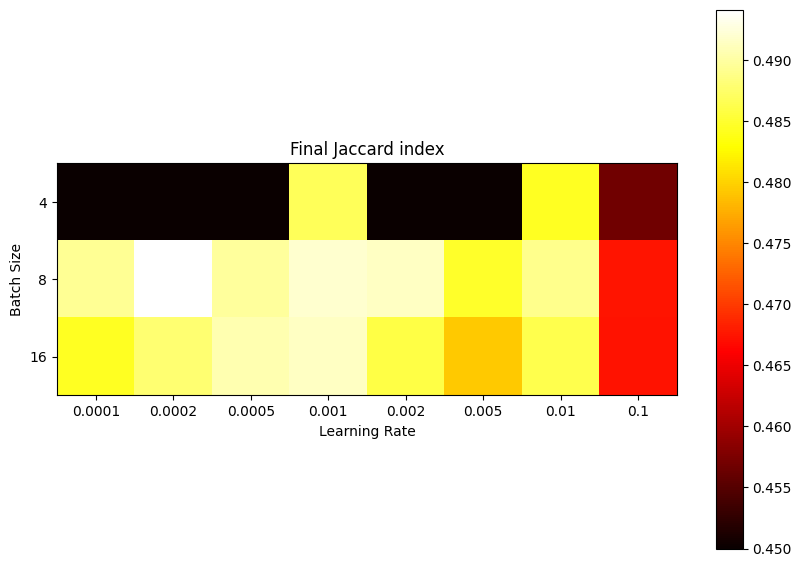

In [44]:
# Plot a heatmap of the highest Jaccard index for each combination of batch size and learning rate
heatmap = gridsearch_results.pivot_table(index='Batch Size', columns='Learning Rate', values='Final Jaccard index', aggfunc=np.max)
# Replace NaN values with 0
heatmap = heatmap.fillna(0.45)

plt.figure(figsize=(10, 7))
plt.title('Final Jaccard index')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.xticks(range(len(heatmap.columns)), heatmap.columns)
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


In [45]:
print(heatmap)


Learning Rate    0.0001    0.0002    0.0005    0.0010    0.0020    0.0050  \
Batch Size                                                                  
4              0.450000  0.450000  0.450000  0.486807  0.450000  0.450000   
8              0.489342  0.494172  0.489686  0.491948  0.491524  0.484716   
16             0.484405  0.487788  0.490649  0.491426  0.486026  0.479363   

Learning Rate    0.0100    0.1000  
Batch Size                         
4              0.484438  0.456741  
8              0.489066  0.467550  
16             0.486342  0.467361  


In [38]:
# Delete all files with jaccard loss and job ID < 42438650
for root, dirs, files in os.walk('hedgedexv2.5/output/metrics/'):
    for file in files:
        if file.endswith('.csv'):
            csv_file = os.path.join(root, file)
            file_name = os.path.basename(csv_file)
            parameters = file_name.split('_')
            job_id = int(parameters[1])
            loss = parameters[6]
            if job_id < 42438650 and loss == 'jaccard':
                os.remove(csv_file)

In [29]:
# Compare results with bce and results with jaccard
bce_results = gridsearch_results[gridsearch_results['Loss'] == 'bce']
jaccard_results = gridsearch_results[gridsearch_results['Loss'] == 'jaccard']

In [34]:
print(bce_results.head())
print(jaccard_results.head())

       Job ID  Batch Size  Learning Rate  N Epochs  N Bands Loss  \
97   41497568          16          0.001       100        5  bce   
12   41497549          16          0.010       100        5  bce   
76   41497543           8          0.010       100        5  bce   
102  41497562           8          0.001       100        5  bce   
65   41497564           8          0.001       100        9  bce   

     Final Jaccard index  Highest Jaccard index  \
97              0.421293               0.421293   
12              0.415948               0.416770   
76              0.411004               0.416313   
102             0.404534               0.414585   
65              0.410361               0.410361   

                                             File Name  
97   metrics_41497568_bs16_lr0.001_epochs100_bands5...  
12   metrics_41497549_bs16_lr0.01_epochs100_bands5_...  
76   metrics_41497543_bs8_lr0.01_epochs100_bands5_b...  
102  metrics_41497562_bs8_lr0.001_epochs100_bands5_...  

In [46]:
# Compare 3, 5, 9 bands in the original dataset
three_bands = gridsearch_results[gridsearch_results['N Bands'] == 3]
five_bands = gridsearch_results[gridsearch_results['N Bands'] == 5]
nine_bands = gridsearch_results[gridsearch_results['N Bands'] == 9]


In [47]:
print(three_bands.head())
print(five_bands.head())
print(nine_bands.head())

       Job ID  Batch Size  Learning Rate  N Epochs  N Bands     Loss  \
100  42438711          16          0.010       100        3  jaccard   
91   42438723           8          0.001       100        3  jaccard   
66   42438717           4          0.001       100        3  jaccard   
48   42438699           4          0.010       100        3  jaccard   
68   42438720           8          0.001        20        3  jaccard   

     Final Jaccard index  Highest Jaccard index  \
100             0.470011               0.470833   
91              0.465956               0.477450   
66              0.465058               0.475547   
48              0.464769               0.467175   
68              0.463800               0.464267   

                                             File Name  
100  metrics_42438711_bs16_lr0.01_epochs100_bands3_...  
91   metrics_42438723_bs8_lr0.001_epochs100_bands3_...  
66   metrics_42438717_bs4_lr0.001_epochs100_bands3_...  
48   metrics_42438699_bs4_lr0.01